# MNIST project

Step 1: Import useful libraries


In [ ]:
from keras.datasets import mnist
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization


# Step 2: Import MNIST data set from Tensorflow Keras

In [ ]:
# Model configuration
batch_size = 250
no_epochs = 25
no_classes = 10
validation_split = 0.2
verbosity = 1


In [ ]:
(input_train, target_train), (input_test, target_test)= mnist.load_data()
input_train_shape = input_train.shape
input_test_shape = input_test.shape 

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
input_shape = (input_train_shape[1], input_train_shape[2], 1)

In [ ]:
input_train = input_train.reshape(input_train_shape[0], input_train_shape[1], input_train_shape[2], 1)
input_test = input_test.reshape(input_test_shape[0], input_test_shape[1], input_test_shape[2], 1)

In [ ]:
input_train = input_train.astype('float32')
input_test = input_test.astype('float32')

# Step 3: Normalize data set

In [ ]:
input_train = input_train / 255
input_test = input_test / 255

Step 4:Building neural network model with Batchnormalization 

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(no_classes, activation='softmax'))

In [ ]:
model.compile(loss=tensorflow.keras.losses.sparse_categorical_crossentropy,
              optimizer=tensorflow.keras.optimizers.Adam(),
              metrics=['accuracy'])

# Step 5: Training model

In [ ]:
history = model.fit(input_train, target_train,
            batch_size=batch_size,
            epochs=no_epochs,
            verbose=verbosity,
            validation_split=validation_split)

Epoch 1/25
192/192 [==============================] - 35s 181ms/step - loss: 0.2943 - accuracy: 0.9154 - val_loss: 0.0901 - val_accuracy: 0.9745
Epoch 2/25
192/192 [==============================] - 35s 181ms/step - loss: 0.0739 - accuracy: 0.9773 - val_loss: 0.0589 - val_accuracy: 0.9837
Epoch 3/25
192/192 [==============================] - 35s 181ms/step - loss: 0.0510 - accuracy: 0.9842 - val_loss: 0.0545 - val_accuracy: 0.9832
Epoch 4/25
192/192 [==============================] - 35s 180ms/step - loss: 0.0393 - accuracy: 0.9880 - val_loss: 0.0465 - val_accuracy: 0.9868
Epoch 5/25
192/192 [==============================] - 35s 180ms/step - loss: 0.0321 - accuracy: 0.9900 - val_loss: 0.0466 - val_accuracy: 0.9863
Epoch 6/25
192/192 [==============================] - 35s 181ms/step - loss: 0.0257 - accuracy: 0.9918 - val_loss: 0.0430 - val_accuracy: 0.9872
Epoch 7/25
192/192 [==============================] - 35s 181ms/step - loss: 0.0207 - accuracy: 0.9936 - val_loss: 0.0472 - val_ac

# Step 6: Print best epoch scores and accuracy-loss plots

In [ ]:
score = model.evaluate(input_test, target_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Test loss: 0.03281136229634285 / Test accuracy: 0.9927999973297119


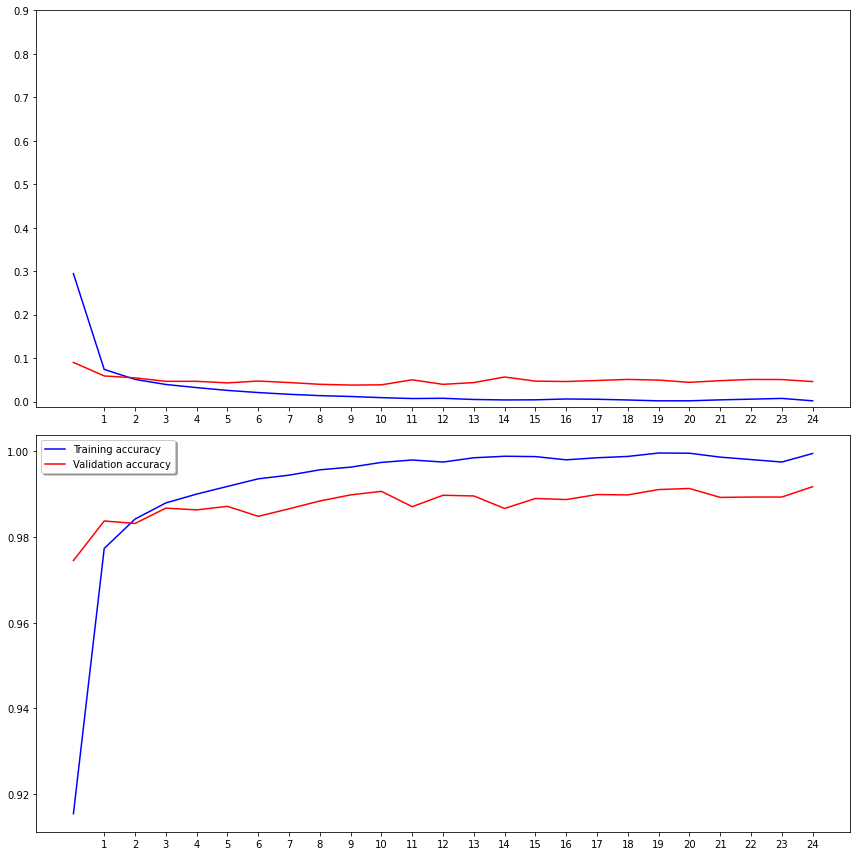

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
model.save_weights("model.h5")

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, 25, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, 25, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()